In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Import 

In [18]:
nrcan_mining_df = gpd.read_file(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\900A_73rd_2023_shape\900A_73rd_shape\900A_73rd_ProducingMines.shp')

nrcan_manufacturing_df = gpd.read_file(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\900A_73rd_2023_shape\900A_73rd_shape\900A_73rd_MetalWorks.shp')

nrcan_oilgas_df = gpd.read_file(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\900A_73rd_2023_shape\900A_73rd_shape\900A_73rd_OilAndGas.shp')

In [20]:
nrcan_mining_df.to_excel(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\nrcan_mining_df.xlsx')
nrcan_manufacturing_df.to_excel(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\nrcan_manufacturing_df.xlsx')
nrcan_oilgas_df.to_excel(
    r'data\NRCan\Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)\nrcan_oilgas_df.xlsx')

In [2]:
# NRCan datasets
nrcan_mining_df = pd.read_excel(
    r'data/NRCan/Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)/producing_mines.xlsx')
nrcan_manufacturing_df = pd.read_excel(
    r'data/NRCan/Principal Mineral Areas, Producing Mines, and Oil and Gas Fields (900A)/metal_work.xlsx')
nrcan_critical_df = pd.read_excel(
    r'data/NRCan/Critical minerals advanced projects, mines and processing facilities in Canada/Critical minerals advanced projects, mines and processing facilities.xlsx'
)

In [3]:
# MinCan datasets
min_can_df = pd.read_excel(
    r'data/Sources/MinCan _Past and Present Productive Mines of Canada, 1950-2022_March2024.xlsx', 
    sheet_name='Data')

In [ ]:
# NPRI datasets
npri_df = pd.read_excel(
    r'data/Emissions_accounts/Raw_data/NPRI/NPRI-INRP_DataDonnées_2023.xlsx', 
    sheet_name='INRP-NPRI 2023', 
    skiprows=3)

In [ ]:
# GHG from large facilities datasets
ghg_facility_df = pd.read_csv(
    r'data/Emissions_accounts/Raw_data/GHG_large_facilities/Greenhouse gas emissions from large facilities.csv',
    encoding='ISO-8859-1')

In [ ]:
# SUT energy datasets 
sut_df = pd.read_csv(
    r'data/Emissions_accounts/Raw_data/Mining industries, energy consumption by NAICS - 16100029-eng/16100029.csv'
) 

In [ ]:
# Climate Trace Canada datasets 
##Sources
ctrace_copper = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/copper-mining_emissions_sources.csv')
ctrace_iron = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/iron-mining_emissions_sources.csv')
## Confidence
ctrace_copper_confidence = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/copper-mining_emissions_sources_confidence.csv')
ctrace_iron_confidence = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/iron-mining_emissions_sources_confidence.csv')
## Ownership
ctrace_copper_ownership = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/copper-mining_emissions_sources_ownership.csv')
ctrace_iron_ownership = pd.read_csv(r'data/Sources/ClimateTRACE/CAN/DATA/mineral_extraction/iron-mining_emissions_sources_ownership.csv')

## GPKG file for all mineral extraction worldwide
ctrace_gdf = gpd.read_file(
    "data/Sources/ClimateTRACE/mineral_extraction/DATA/mineral-extraction_geometries.gpkg")


# Clean

## NRCan

In [4]:
from db_creation_data_cleaning import plot_commodity_distribution

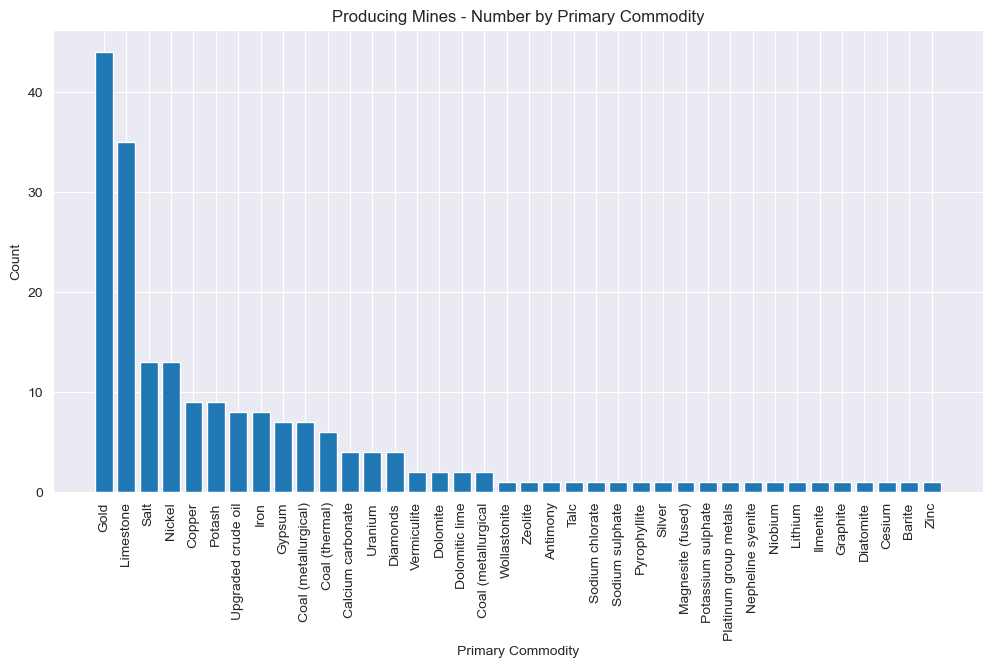

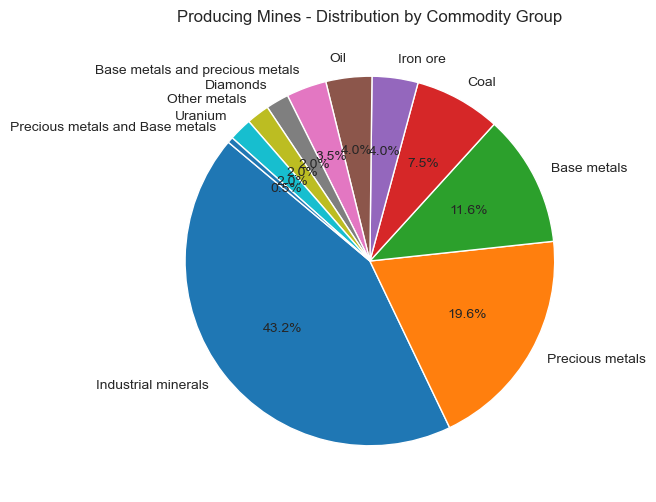

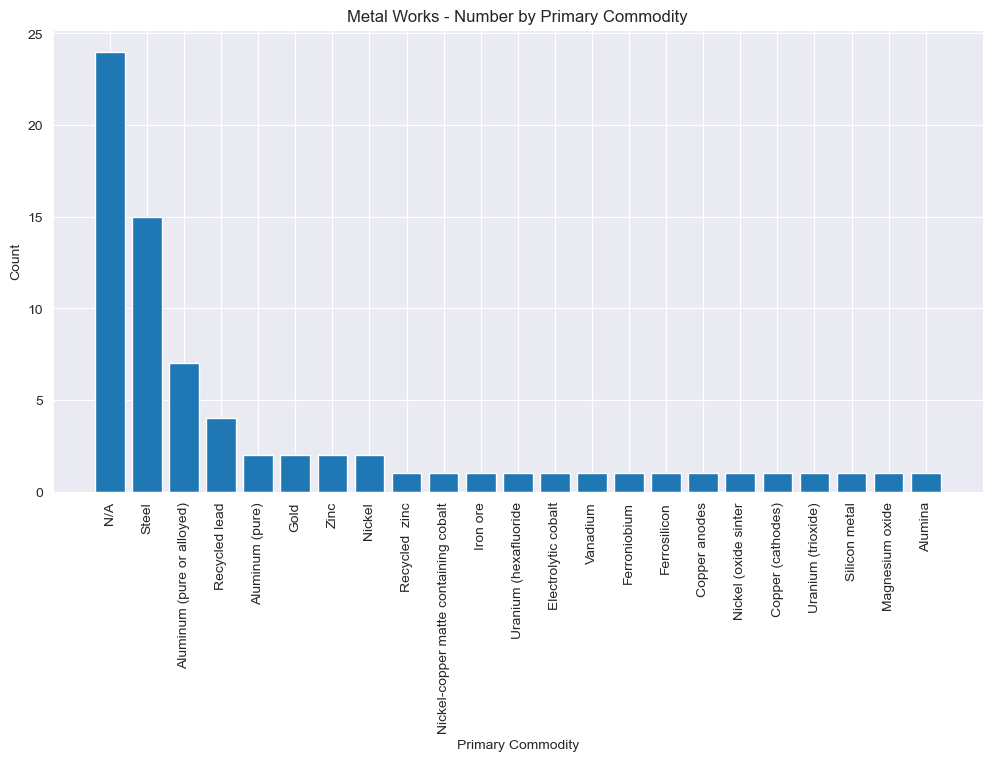

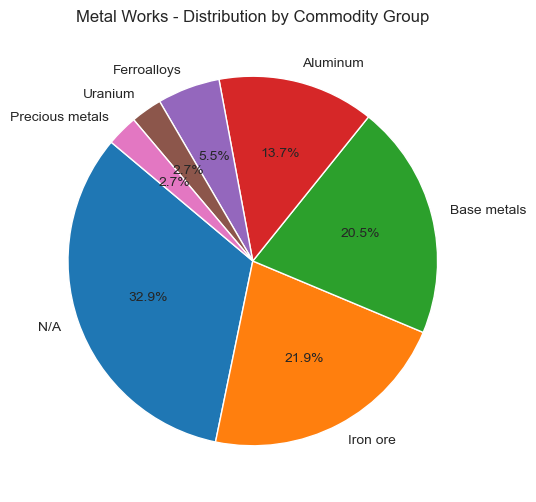

In [5]:
plot_commodity_distribution(nrcan_mining_df, "COM_DESC_E", "COM_GROU_E", "Producing Mines")
plot_commodity_distribution(nrcan_manufacturing_df, "COM_DESC_E", "COM_GROU_E", "Metal Works")

In [6]:
# We can drop all industrial minerals from the mining dataset
nrcan_mining_df = nrcan_mining_df[nrcan_mining_df["COM_GROU_E"] != "Industrial minerals"]

In [7]:
nrcan_mining_df

,OPERATIO_E,OPERATIO_F,OWNER_E,OWNER_F,FAC_TYPE_E,FAC_TYPE_F,FAC_DESC_E,FAC_DESC_F,COMMODIT_E,COMMODIT_F,...,COM_GROU_E,COM_GROU_F,CITY_E,CITY_F,PROVINCE_E,PROVINCE_F,LATITUDE,LONGITUDE,Primary_Commodity,Commodity_Group
0,Keno Hill Silver District,Keno Hill Silver District,Hecla Mining Company,Hecla Mining Company,"(U., C.)","(Sout., Con.)","Underground, concentrator","Souterraine, concentrateur","Ag, Zn, Pb","Ag, Zn, Pb",...,Precious metals and Base metals,Métaux précieux et métaux communs,Mayo,Mayo,Yukon,Yukon,63.916700,-135.483300,Silver,Precious metals and Base metals
1,Amaruq,Amaruq,Agnico Eagle Mines Limited,Mines Agnico Eagle Limitée,"(P., U.)","(C.O., Sout.)","Open-pit, underground","Ciel ouvert, souterraine",Au,Au,...,Precious metals,Métaux précieux,Baker Lake,Baker Lake,Nunavut,Nunavut,65.415000,-96.697000,Gold,Precious metals
2,Detour Lake,Detour Lake,Agnico Eagle Mines Limited,Mines Agnico Eagle Limitée,"(P., C.)","(C.O., Con.)","Open-pit, concentrator","Ciel ouvert, concentrateur",Au,Au,...,Precious metals,Métaux précieux,Northeast of Cochrane,au nord-est de Cochrane,Ontario,Ontario,50.018143,-79.717631,Gold,Precious metals
3,Meadowbank,Meadowbank,Agnico Eagle Mines Limited,Mines Agnico Eagle Limitée,(C.),(Con.),Concentrator,Concentrateur,Au,Au,...,Precious metals,Métaux précieux,Baker Lake,Baker Lake,Nunavut,Nunavut,65.019996,-96.071313,Gold,Precious metals
4,Meliadine,Meliadine,Agnico Eagle Mines Limited,Mines Agnico Eagle Limitée,"(P., U., C.)","(C.O., Sout., Con.)","Open-pit, underground, concentrator","Ciel ouvert, souterraine, concentrateur",Au,Au,...,Precious metals,Métaux précieux,Rankin Inlet,Rankin Inlet,Nunavut,Nunavut,63.031529,-92.220206,Gold,Precious metals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Fort Hills,Fort Hills,Suncor Energy Inc.,Suncor Énergie Inc.,(P.),(C.O.),Open-pit,Ciel ouvert,Upgraded crude oil,Pétrole brut enrichi,...,Oil,Pétrole,Fort MacKay,Fort MacKay,Alberta,Alberta,57.395200,-111.572000,Upgraded crude oil,Oil
191,Millennium and Steepbank,Millennium et Steepbank,Suncor Energy Inc.,Suncor Énergie Inc.,(P.),(C.O.),Open-pit,Ciel ouvert,Upgraded crude oil,Pétrole brut enrichi,...,Oil,Pétrole,Fort McMurray,Fort McMurray,Alberta,Alberta,56.871900,-111.340000,Upgraded crude oil,Oil
192,Aurora North and South,Aurora Nord et Sud,Syncrude Canada Ltd.,Syncrude Canada Ltée,(P.),(C.O.),Open-pit,Ciel ouvert,Upgraded crude oil,Pétrole brut enrichi,...,Oil,Pétrole,Fort MacKay,Fort MacKay,Alberta,Alberta,57.313400,-111.458000,Upgraded crude oil,Oil
193,Mildred Lake,Lac Mildred,Syncrude Canada Ltd.,Syncrude Canada Ltée,(P.),(C.O.),Open-pit,Ciel ouvert,Upgraded crude oil,Pétrole brut enrichi,...,Oil,Pétrole,Fort MacKay,Fort MacKay,Alberta,Alberta,57.000000,-111.466700,Upgraded crude oil,Oil


In [8]:
def plot_owner_occurrences(df, dataset_name=None, column=None):
    """
    Plots the number of occurrences of each unique value in the specified column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column (str): The column to count unique occurrences for 
    - title (str): The title of the plot.

    Returns:
    - None (displays a bar plot).
    """
    # Count occurrences of each unique value
    owner_counts = df[column].value_counts()
    
    # Truncate long names for display (max 20 characters)
    truncated_labels = [name[:20] + "…" if len(name) > 20 else name for name in owner_counts.index]


    # Plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    owner_counts.plot(kind="bar", ax=ax)
    plt.xlabel("Company Name")
    plt.ylabel("Number of Occurrences")
    plt.title(f"Owner occurrences in {dataset_name}")
    plt.xticks(ticks=range(len(truncated_labels)), labels=truncated_labels, rotation=90, ha="right", fontsize=6)
    plt.show()

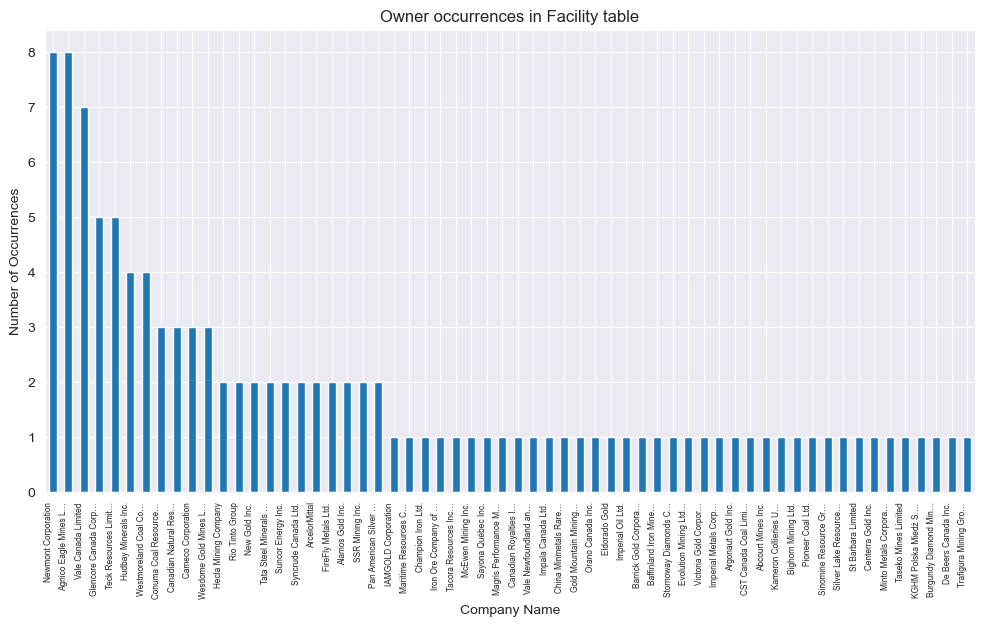

In [9]:
plot_owner_occurrences(nrcan_mining_df, dataset_name='Facility table', column='OWNER_E')


## MinCan

In [ ]:
from db_creation_data_cleaning import is_mine_active

In [ ]:
# Apply the function to create a new column 'mine_status'
min_can_df['mine_status'] = min_can_df.apply(is_mine_active, axis=1)

In [ ]:
min_can_df

In [ ]:
def plot_mine_status(df):
    """
    Plots two figures:
    1. Mine openings and closures over time, with active mine count.
    2. Current active vs. inactive mines as a pie chart.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'open1', 'close1', 'open2', 'close2', 'open3', 'close3', and 'mine_status'.
    """

    # Extract relevant columns related to opening and closing years
    open_close_columns = ['open1', 'close1', 'open2', 'close2', 'open3', 'close3']
    
    # Convert columns to numeric, handling non-numeric values (like 'open')
    df_filtered = df[open_close_columns].apply(pd.to_numeric, errors='coerce')

    # Reshape data into long format
    df_melted = df_filtered.melt(value_name='year', var_name='event').dropna()

    # Determine whether the event is an opening (+1) or closing (-1)
    df_melted['count'] = df_melted['event'].apply(lambda x: 1 if 'open' in x else -1)

    # Aggregate counts per year
    df_yearly = df_melted.groupby('year')['count'].sum().reset_index()

    # Compute cumulative sum for active mines
    df_yearly['active_mines'] = df_yearly['count'].cumsum()

    # --- Figure 1: Mine Openings and Closures Over Time ---
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.bar(df_yearly['year'], df_yearly['count'], color=['green' if x > 0 else 'red' for x in df_yearly['count']], label="Openings/Closures")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Number of Openings (+) / Closures (-)")
    ax1.axhline(0, color='black', linewidth=0.8)
    ax1.legend(loc="upper left")

    # --- Figure 2: Current Active vs. Inactive Mines ---
    mine_status_counts = df['mine_status'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(mine_status_counts, labels=mine_status_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
    plt.title("Current Active vs. Inactive Mines")
    plt.show()


In [ ]:
# Apply function to the dataset
plot_mine_status(min_can_df)

## GHG facility

In [ ]:
from constants import metal_ore_mining_naics, metal_manufacturing_naics

In [ ]:
from db_creation_data_cleaning import filter_ghg_facility_naics

In [ ]:
ghg_facility_metal_mining_df = filter_ghg_facility_naics(ghg_facility_df, metal_ore_mining_naics)
ghg_facility_metal_manufacturing_df = filter_ghg_facility_naics(ghg_facility_df, metal_manufacturing_naics)

In [ ]:
ghg_facility_metal_mining_df

## NPRI

In [ ]:
def clean_npri(excel_path: str,
               sheet_name_data: str = "INRP-NPRI 2023",
               sheet_name_mapping: str = "mapping_emissions") -> pd.DataFrame:
    """
    Extracts SQL-friendly long-format NPRI data using a structured mapping.

    - Loads data with skiprows=3 to get clean metadata.
    - Renames emission columns using Emission_type + Sub_emission_type_EN.
    - Melts emission columns into long format.
    - Keeps all metadata columns untouched.
    - Removes rows where value is NaN or zero.

    Args:
        excel_path (str): Path to the Excel file.
        sheet_name_data (str): Sheet with the NPRI data.
        sheet_name_mapping (str): Sheet with emission column metadata.

    Returns:
        pd.DataFrame: SQL-ready long-format DataFrame.
    """

    # Step 1: Load the emission column mapping
    mapping_df = pd.read_excel(excel_path, sheet_name=sheet_name_mapping)
    mapping_df["Emission_type"] = mapping_df["Emission_type"].fillna(method="ffill")
    mapping_df["unique_column_name"] = (
        mapping_df["Emission_type"].str.strip() + " - " + mapping_df["Sub_emission_type_EN"].str.strip()
    )

    # Step 2: Load the NPRI data with clean headers
    df = pd.read_excel(excel_path, sheet_name=sheet_name_data, skiprows=3)

    # Step 3: Identify emission columns (based on the mapping length)
    n_emission_cols = len(mapping_df)
    emission_cols = df.columns[-n_emission_cols:]

    # Step 4: Rename only emission columns
    rename_map = dict(zip(emission_cols, mapping_df["unique_column_name"]))
    df_renamed = df.rename(columns=rename_map)

    # Step 5: Melt the emission columns
    id_vars = [col for col in df.columns if col not in emission_cols]
    melted = df_renamed.melt(id_vars=id_vars,
                             value_vars=rename_map.values(),
                             var_name="full_emission_column",
                             value_name="value")

    # Step 6: Split into emission_type and emission_subtype
    melted[["emission_type", "emission_subtype"]] = melted["full_emission_column"].str.split(" - ", n=1, expand=True)

    # Step 7: Remove NaNs and zeros
    melted = melted.dropna(subset=["value"])
    melted = melted[melted["value"] != 0]

    return melted.drop(columns=["full_emission_column"])

In [ ]:
from db_creation_data_cleaning import clean_npri

In [ ]:
npri_df = clean_npri("data/Emissions_accounts/Raw_data/NPRI/NPRI-INRP_DataDonnées_2023.xlsx")

In [ ]:
npri_df

In [ ]:
# Create mapping NPRI-EI through IW+ mapping
# Import existing concordances 
mapping_npri_iw = pd.read_excel(r'data/Concordances/openIO_IW_EI_concordance.xlsx', sheet_name='NPRI_to_IW21')
mapping_ei_iw = pd.read_excel(r'data/Concordances/openIO_IW_EI_concordance.xlsx', sheet_name='EI_to_IW+')

In [ ]:
# Standardize column names for merging
mapping_npri_iw.rename(columns={'IMPACT World+ flows': 'iw_name'}, inplace=True)
mapping_ei_iw.rename(columns={'iw name': 'iw_name'}, inplace=True)

In [ ]:
# Add the 'EI' column to df_npri_iw based on matching iw_name with df_ei_iw
mapping_npri_iw['EI'] = mapping_npri_iw['iw_name'].map(
    lambda iw: mapping_ei_iw[mapping_ei_iw['iw_name'] == iw]['ecoinvent name'].iloc[0]
    if iw in mapping_ei_iw['iw_name'].values else 'No match found'
)


In [ ]:
mapping_npri_iw

In [ ]:
# We need to rename it to merge it to NPRI data
mapping_npri_iw.rename(columns={'OpenIO flows': 'Substance Name (English)'}, inplace=True)

In [ ]:
# We add the Ecoinvent name based on the mapping 
npri_df = npri_df.merge(mapping_npri_iw[['Substance Name (English)', 'EI']],
              on='Substance Name (English)',
              how='left')

In [ ]:
npri_df

In [ ]:
# Removing French names 
npri_df = npri_df.drop(columns=['Terrestrial Ecozone (French)', 'Watershed (French)', 
                                'NAICS 4 Sector Name (French)', 'NAICS 6 Sector Name (French)', 'Substance Name (French)'    ])

In [ ]:
npri_df

In [ ]:
npri_metal_mining_df = npri_df[npri_df["NAICS 4 Sector Name (English)"] == "Metal ore mining"]
npri_metal_manufacturing_df = npri_df[npri_df["NAICS 4 Code"].astype(str).str[:3] == "331"]

## SUT 

In [ ]:
from db_creation_data_cleaning import clean_sut

In [ ]:
sut_df_cleaned = clean_sut(sut_df, year=2022, units_to_exclude=["Thousands of dollars"])
sut_df_cleaned

In [ ]:
sut_df_cleaned['North American Industry Classification System (NAICS)'].value_counts()

In [ ]:
from db_creation_data_cleaning import split_by_naics

In [ ]:
# Apply the function to the cleaned DataFrame
naics_dfs = split_by_naics(sut_df_cleaned)

# Access a specific NAICS DataFrame
uranium_mining_df = naics_dfs['Uranium ore mining [212291]']

### Climate TRACE

In [ ]:
ctrace = pd.concat([ctrace_copper, ctrace_iron])
ctrace_confidence = pd.concat([ctrace_copper_confidence, ctrace_iron_confidence])
ctrace_copper_ownership = pd.concat([ctrace_copper_ownership, ctrace_iron_ownership])

In [ ]:
def plot_categorical_distributions(df, columns_of_interest, layout=(2, 3), save_path=None):
    """
    Plots pie charts for categorical distributions in a given DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        columns_of_interest (list): List of categorical columns to visualize.
        layout (tuple): Layout of the subplots (rows, cols).
        save_path (str, optional): Path to save the image. If None, it is not saved.
    """
    import matplotlib.pyplot as plt
    
    # Define color map to ensure consistency across plots
    unique_categories = set()
    for col in columns_of_interest:
        unique_categories.update(df[col].dropna().unique())

    color_map = plt.get_cmap("tab10")  # Use tab10 colormap for distinct colors
    colors = {cat: color_map(i % 10) for i, cat in enumerate(sorted(unique_categories))}

    # Create subplots
    fig, axes = plt.subplots(layout[0], layout[1], figsize=(layout[1] * 5, layout[0] * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy indexing

    for i, col in enumerate(columns_of_interest):
        if i >= len(axes):  # Stop if more columns than subplots
            break
        
        ax = axes[i]
        counts = df[col].value_counts(normalize=True) * 100
        colors_list = [colors[cat] for cat in counts.index]  # Ensure consistent color coding

        counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=colors_list, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("")  # Hide y-axis label for clarity

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=300)
    
    plt.show()

In [ ]:
def compute_annual_figures(df, date_column, columns_to_sum, metadata_columns):
    """
    Aggregates the sum of selected columns by year while keeping relevant metadata.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        date_column (str): The name of the column containing datetime values.
        columns_to_sum (list): List of column names to aggregate by year.
        metadata_columns (list): List of metadata columns to keep.

    Returns:
        pd.DataFrame: A DataFrame with annual sums and relevant metadata.
    """
    
    # Ensure date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], errors="coerce")

    # Extract year from the date column
    df["year"] = df[date_column].dt.year  
    
    # Group by year and relevant metadata, summing numerical columns
    annual_sums = df.groupby(["year"] + metadata_columns, as_index=False)[columns_to_sum].sum()
    
    return annual_sums

In [ ]:
def plot_subsector_breakdown_stacked(df, subsector_column, subsector_value, year_column, breakdown_columns, value_columns, save_path=None):
    """
    Plots stacked bar charts for emissions, activity, and capacity for a specific subsector per year,
    categorized by specified breakdown columns.

    Parameters:
        df (pd.DataFrame): The dataset containing relevant data.
        subsector_column (str): Column representing the subsector.
        subsector_value (str): The specific subsector to filter for visualization.
        year_column (str): Column representing the year.
        breakdown_columns (list): List of categorical columns used for breakdown (e.g., 'other1', 'other2').
        value_columns (list): List of numerical columns to visualize (e.g., emissions, activity, capacity).
        save_path (str, optional): Path to save the image. If None, it is not saved.
    """
    import matplotlib.pyplot as plt
    
    # Filter data for the selected subsector
    df_filtered = df[df[subsector_column] == subsector_value]
    
    # Group data by year and breakdown columns, summing numerical values
    grouped_df = df_filtered.groupby([year_column] + breakdown_columns, as_index=False)[value_columns].sum()

    # Define figure layout
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # 3 rows, 1 column
    colors = plt.get_cmap("tab10")  # Consistent color scheme

    # Create stacked bar plots for each value column
    for i, value_col in enumerate(value_columns):
        pivot_df = grouped_df.pivot(index=year_column, columns=breakdown_columns[0], values=value_col)
        pivot_df.plot(kind="bar", stacked=True, ax=axes[i], colormap=colors)
        
        axes[i].set_title(f"{value_col} Breakdown for {subsector_value}")
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel(value_col)
        axes[i].legend(title=breakdown_columns[0])
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()

In [ ]:
plot_categorical_distributions(
    ctrace_confidence, 
    columns_of_interest=["source_type", "capacity", "capacity_factor", "activity", "emissions_factor", "emissions_quantity"], 
    layout=(2, 3), 
    save_path="results/ctrace_confidence.png")

In [ ]:
metadata_columns = ['source_id', 'source_name', 'source_type', 'iso3_country', 'sector',
       'subsector','lat', 'lon', 'geometry_ref',
       'gas', 'activity_units', 'emissions_factor', 'emissions_factor_units',
        'capacity_units', 'capacity_factor', 'other1', 'other1_def',
       'other2', 'other2_def', 'other3', 'other3_def', 'sector_id'
                    ]
columns_to_sum = ['emissions_quantity', 'activity', 'capacity']

In [ ]:
# Compute annual sums while keeping relevant metadata
ctrace_annual = compute_annual_figures(
    ctrace, 
    'start_time', 
    columns_to_sum, 
    metadata_columns)
ctrace_annual

In [ ]:
#Activity = represents the amount in t or ore extracted (e.g. t of copper ore, t of iron ore)
#Capacity = metal resource contained in the mine (e.g. metal resource contained in the mine in tonnes)

# Exports

In [ ]:
min_can_df.to_csv(r'data/cleaned_data/min_can_cleaned_df.csv', index=False)
ghg_facility_metal_mining_df.to_csv(r'data/cleaned_data/ghg_facility_metal_mining_df.csv', index=False)
ghg_facility_metal_manufacturing_df.to_csv(r'data/cleaned_data/ghg_facility_metal_manufacturing_df.csv', index=False)
npri_metal_mining_df.to_csv(r'data/cleaned_data/npri_metal_mining_df.csv', index=False)
npri_metal_manufacturing_df.to_csv(r'data/cleaned_data/npri_metal_manufacturing_df.csv', index=False)
tailings_df.to_csv(r'data/cleaned_data/tailings_df.csv', index=False)
ctrace_annual.to_csv(r'data/cleaned_data/ctrace_annual.csv', index=False)